## 1. 테이블 데이터와 시계열 데이터
- `테이블 데이터`: 엑셀과 같이 행과 열로 나타낸 데이터
  - feature: 테이블의 각 열을 의미
  - record: 테이블의 각 행을 의미
  - index: 각 데이터 위치를 식별하기 위한 값

- `시계열 데이터`: 일정 시간 간격으로 배치된 데이터 (시간에 종속된 데이터)

> 이외에도 다양한 형태의 데이터가 있을 수 있으나, 대부분 테이블 데이터 형태로 처리 가능

## 2. 시계열 데이터 시각화를 위한 사전 준비

#### **2.1** 날짜 인덱스 생성 방법
- `pd.date_range(start='2020-01-01', end='2020-12-31')`
    - `freq='3ME'`: 3개월
    - `freq='D'`: 1일
    - `periods=10`: start와 end 사이 균등 시간 분할
    - 참고: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

In [7]:
import pandas as pd
pd.date_range(start='2020-01-01', end='2020-12-31')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [9]:
pd.date_range(start='2020-01-01', end='2020-12-31', periods=3)

DatetimeIndex(['2020-01-01 00:00:00', '2020-07-01 12:00:00',
               '2020-12-31 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [13]:
pd.date_range(start='2020-01-01', end='2020-12-31', freq='3ME')

DatetimeIndex(['2020-01-31', '2020-04-30', '2020-07-31', '2020-10-31'], dtype='datetime64[ns]', freq='3ME')

#### **2.2** pandas DataFrame으로 시계열 데이터 만드는 방법
- `pd.DataFrame(data={컬럼이름:컬럼데이터리스트})`
    - {컬럼이름:컬럼데이터리스트} 는 사전 데이터 형식
    - data=은 생략 가능
- `pd.DataFrame(data=리스트, columns=컬럼이름, index=인덱스데이터)`

In [17]:
import numpy as np
import pandas as pd

date_index = pd.date_range('2025-02-01', periods=15)
df = pd.DataFrame(data=range(len(date_index)), columns=['count'], index=date_index)
df

,count
2025-02-01,0
2025-02-02,1
2025-02-03,2
2025-02-04,3
2025-02-05,4
2025-02-06,5
2025-02-07,6
2025-02-08,7
2025-02-09,8
2025-02-10,9


## 3. 시계열 데이터를 위해 주로 사용되는 그래프 타입
- 라인 그래프
- 막대 그래프

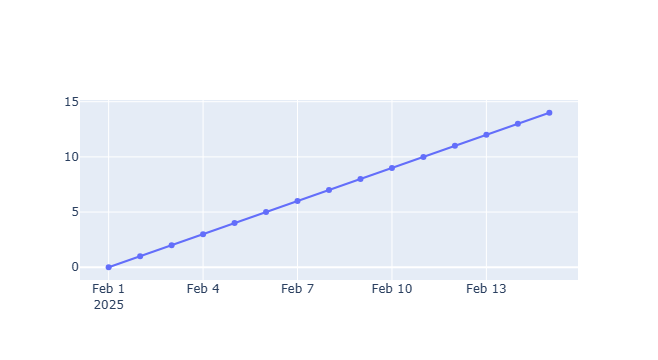

In [27]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=df.index, y=df['count']
    )
)
fig.show()

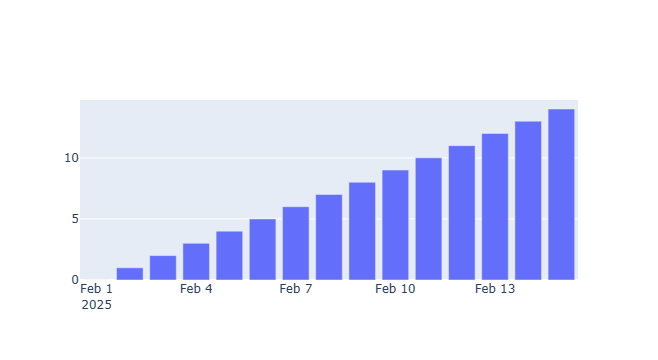

In [22]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df.index, y=df['count']
    )
)
fig.show()

## 4. 상관관계를 확인하기 위해 주로 사용되는 그래프 타입
- feature 간의 연관 관계 분석
- 주요 그래프 타입
    - heatmap 그래프
    - 산점도(scatter) 그래프

#### **4.1** heatmap 그래프
- 모든 feature 간의 상관관계를 파악하고 싶을 때 사용

In [31]:
import pandas as pd
doc = pd.read_csv("00_Material(Uploaded)/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv", encoding='utf-8-sig')

In [37]:
# 상관관계 확인
doc2 = doc.corr(numeric_only=True)
doc2

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
FIPS,1.000000,0.160717,0.171490,-0.000504,0.076467,NaN,0.002718
Lat,0.160717,1.000000,-0.476426,0.029389,0.026309,-0.002781,0.035631
Long_,0.171490,-0.476426,1.000000,0.141126,0.096924,0.141932,0.119737
Confirmed,-0.000504,0.029389,0.141126,1.000000,0.837153,0.727305,0.942484
Deaths,0.076467,0.026309,0.096924,0.837153,1.000000,0.546858,0.796549
Recovered,NaN,-0.002781,0.141932,0.727305,0.546858,1.000000,0.462484
Active,0.002718,0.035631,0.119737,0.942484,0.796549,0.462484,1.000000


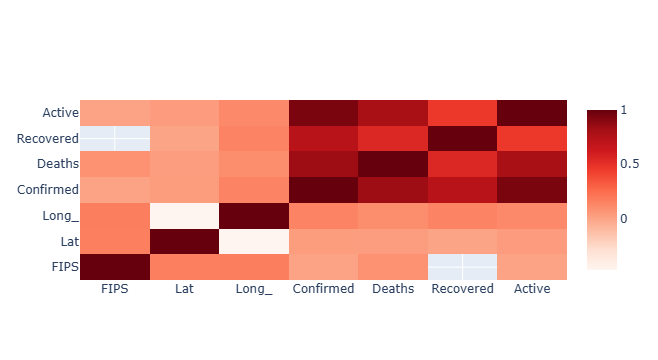

In [42]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x=doc2.index,
        y=doc2.columns,
        z=doc2,
        colorscale='Reds'
    )
)
fig.show()

#### **4.2** 산점도(scatter) 그래프
- 각각의 feature 간의 상관관계를 파악하고 싶을 때 사용

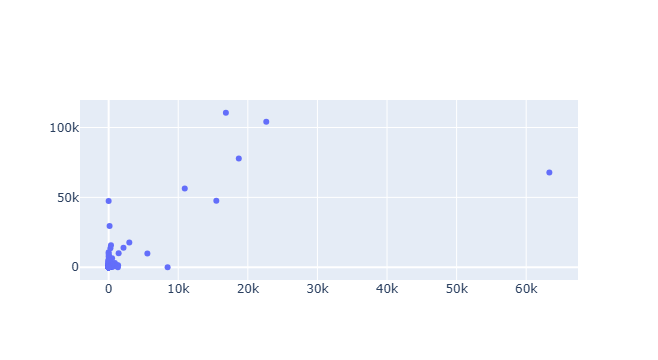

In [46]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Scatter(    
        x=doc['Recovered'],
        y=doc['Confirmed'],
        mode='markers'
    )
)

fig.show()